In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

In [2]:
data = np.loadtxt( '02_data01.csv', comments='No.', delimiter=',', dtype='int' )
w = data[:,1]
w

array([48, 48, 40, 52, 60, 55, 52, 55, 53, 50, 53, 62, 48, 55, 45, 48, 50,
       50, 50, 48, 52, 50, 55, 53, 49, 56, 52, 56, 50, 52, 50, 55, 50, 56,
       66, 49, 55, 58, 48, 58, 52, 57, 56, 50, 49, 52, 41, 45, 46, 50, 49,
       50, 53, 58, 52, 48, 65, 56, 50, 60, 55, 54, 55, 52, 50, 50, 48, 52,
       52, 50, 55, 50, 56, 54, 48, 54, 50, 49, 52, 52, 54, 55, 52, 49, 51,
       55, 50, 51, 45, 56, 53, 50, 53, 55, 55, 51, 48, 52, 63, 68])

In [29]:
print('size of w        : %d'%w.size)
print('min              : %d'%np.min(w))
print('max              : %d'%np.max(w))
print('mean             : %d'%np.mean(w))
print('median           : %d'%np.median(w))
print('unbiased variance: %d'%np.var(w))

size of w: 100
min              : 40
max              : 68
mean             : 52
median           : 52
unbiased variance: 20


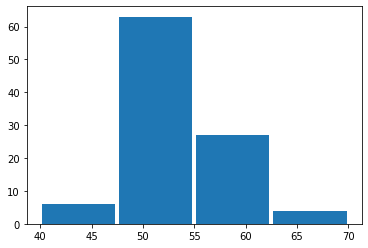

In [3]:
plt.hist (w, bins=4, rwidth = 0.95, range = (40,70) )
plt.show()

<h1>ヒストグラム</h1>

In [10]:
def f(nbins=6):
    plt.hist (w, bins=nbins, rwidth = 0.95, range = (40, 70) )
    plt.xlim(40, 70)
    if nbins < 5:
        plt.ylim(0, 100)
    else:
        plt.ylim(0, 50)
    plt.show()

interact(f, nbins=(1, 31, 1))

interactive(children=(IntSlider(value=6, description='nbins', max=31, min=1), Output()), _dom_classes=('widget…

<function __main__.f(nbins=6)>

<h3>Sturges' Method</h3>

In [31]:
# Sturges' method
N = w.size
print('log_2 N + 1 = %f'%(np.log2(N) + 1))
print('nbins = %d'%np.ceil(np.log2(N) + 1))

log_2 N + 1 = 7.643856
nbins = 8


<h3>Scott's Method</h3>

In [40]:
# Scott's method
m  = np.mean(w)
sd = np.std(w)
h = 3.5 * sd / N**(1.0/3.0)
print('binwidth = %f'%h)

nbins = (np.max(w)-np.min(w)) / h
print('nbins = [%f] = %d'%(nbins, np.ceil(nbins)))

binwidth = 3.441280
nbins = [8.136508] = 9


<h3>Freedman--Diaconis' Method</h3>

In [41]:
# Freedman--Diaconis' method
from scipy import stats
Q1 = np.quantile(w, 0.25)
Q3 = np.quantile(w, 0.75)
h = 2.0*(Q3-Q1)/N**(1.0/3.0)
nbins = (np.max(w)-np.min(w)) / h
print('nbins = [%f] = %d'%(nbins, np.ceil(nbins)))

nbins = [12.996449] = 13


('#bins=', 12.99644873411578)

<h1>累積度数表示</h1>

In [43]:
def f_c(nbins=6):
    plt.hist (w, bins=nbins, rwidth = 0.95, range = (40, 70), cumulative = True )
    plt.xlim(40, 70)
    plt.show()

interact(f_c, nbins=(1, 31, 1))

interactive(children=(IntSlider(value=6, description='nbins', max=31, min=1), Output()), _dom_classes=('widget…

<function __main__.f_c(nbins=6)>

<h1>二項分布</h1>

In [46]:
def f_binomial(N=7):
    data_2 = np.random.binomial(N, 0.5, 100000)
    plt.hist (data_2, bins=N, rwidth = 0.95, range = (-0.5,N-0.5), density=True)
    plt.show()

interact(f_binomial, N=(1,201,2))

interactive(children=(IntSlider(value=7, description='N', max=201, min=1, step=2), Output()), _dom_classes=('w…

<function __main__.f_binomial(N=7)>

<h1>二項係数</h1>

In [49]:
from scipy.special import binom

def fact(n):
    if n == 0: return 1
    return n * fact(n - 1)

def f_binomial_coeff(N=7):
    data_3 = [0] * (N+1)
    for i in range(0,N):
        #data_3[i] = fact(N) / fact(i) / fact(N-i) / 2**N
        data_3[i] = binom(N, i) / 2**N
        
    plt.plot(data_3)

interact(f_binomial_coeff, N=(1, 169, 2))

interactive(children=(IntSlider(value=7, description='N', max=169, min=1, step=2), Output()), _dom_classes=('w…

<function __main__.f_binomial_coeff(N=7)>

# 二次元ヒストグラム

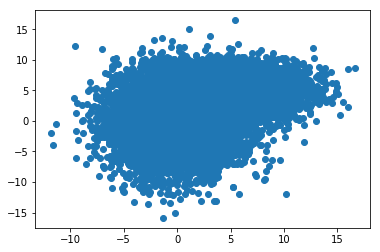

In [17]:
x1, x2 = np.vstack((np.random.multivariate_normal([0, 0], [[10.0, 0],[0,20]], 5000) 
                 ,np.random.multivariate_normal([5,5], [[10.0, 0],[0, 5]], 5000))).T
plt.scatter(x1, x2)

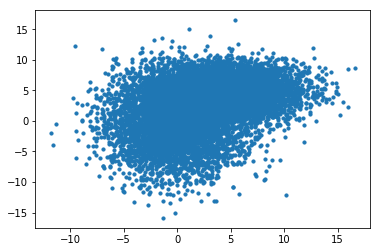

In [45]:
plt.scatter(x1, x2, s=10)

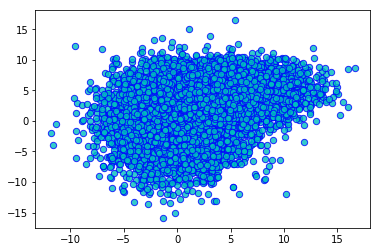

In [34]:
plt.scatter(x1, x2, s=40, alpha=0.8, c="c", edgecolors="b")

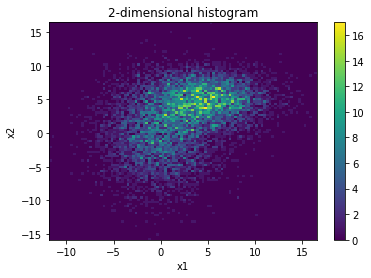

In [48]:
fig2dhist = plt.figure()
ax = fig2dhist.add_subplot(111)

H = ax.hist2d(x1,x2, bins=100)
ax.set_title('2-dimensional histogram')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
fig2dhist.colorbar(H[3],ax=ax)
plt.show()